* "소상공인시장진흥공단_상가(상권)정보_20220331"를 다운받으세요.
* https://www.data.go.kr/data/15083033/fileData.do#layer_data_infomation

## 필요한 라이브러리 불러오기

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [33]:
# 파일을 불러와 df 라는 변수에 담습니다.
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df = pd.read_csv("data/lab3/부산_202203.csv")
df.shape

C:\Users\sigma\AppData\Local\Temp\ipykernel_11148\3232272053.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/lab3/부산_202203.csv")


(147799, 39)

### 데이터 미리보기

In [34]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979


### info 보기

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147799 entries, 0 to 147798
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     147799 non-null  int64  
 1   상호명        147798 non-null  object 
 2   지점명        22032 non-null   object 
 3   상권업종대분류코드  147799 non-null  object 
 4   상권업종대분류명   147799 non-null  object 
 5   상권업종중분류코드  147799 non-null  object 
 6   상권업종중분류명   147799 non-null  object 
 7   상권업종소분류코드  147799 non-null  object 
 8   상권업종소분류명   147799 non-null  object 
 9   표준산업분류코드   138317 non-null  object 
 10  표준산업분류명    138317 non-null  object 
 11  시도코드       147799 non-null  int64  
 12  시도명        147799 non-null  object 
 13  시군구코드      147799 non-null  int64  
 14  시군구명       147799 non-null  object 
 15  행정동코드      147799 non-null  int64  
 16  행정동명       147793 non-null  object 
 17  법정동코드      147799 non-null  int64  
 18  법정동명       147799 non-null  object 
 19  지번코드       147799 non-n

### 결측치 보기

<Axes: >

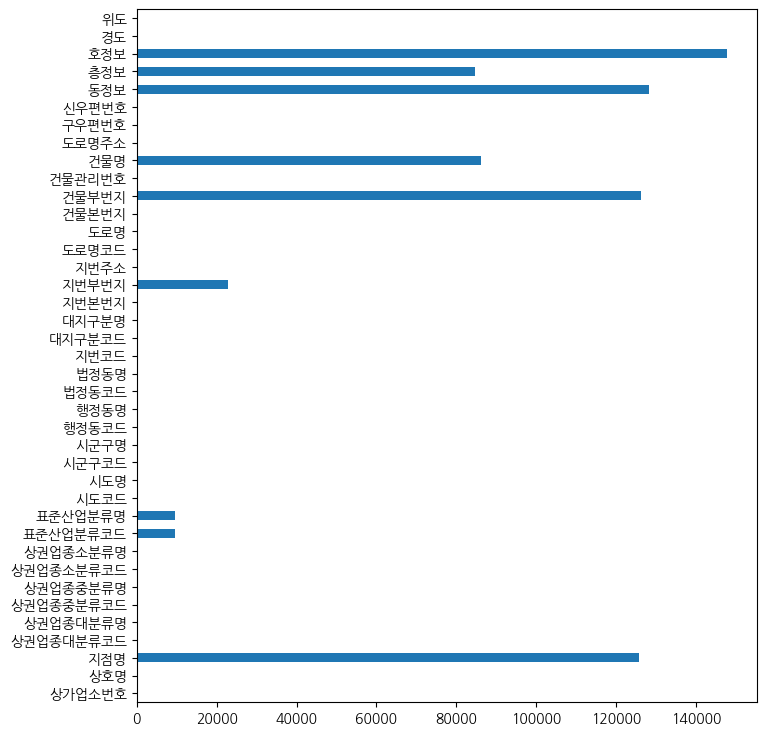

In [28]:
df.isnull().sum().plot.barh(figsize=(8, 9))

### 사용하지 않는 컬럼 제거하기

In [29]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(147799, 11)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147799 entries, 0 to 147798
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       147798 non-null  object 
 1   상권업종대분류명  147799 non-null  object 
 2   상권업종중분류명  147799 non-null  object 
 3   상권업종소분류명  147799 non-null  object 
 4   시도명       147799 non-null  object 
 5   시군구명      147799 non-null  object 
 6   행정동명      147793 non-null  object 
 7   법정동명      147799 non-null  object 
 8   도로명주소     147799 non-null  object 
 9   경도        147799 non-null  float64
 10  위도        147799 non-null  float64
dtypes: float64(2), object(9)
memory usage: 12.4+ MB


## 색인으로 서브셋 가져오기

In [15]:
# df[df["상호명"].isnull()]

In [36]:
df.dropna(subset=['상호명'], inplace=True)

In [37]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df["상호명_소문자"] = df["상호명"].str.lower()

In [38]:
df.loc[df["상호명_소문자"].str.contains("이디야|이디아|ediya"), "상호명_소문자"].shape

(121,)

In [39]:
df.loc[df["상호명_소문자"].str.contains("스타벅스|starbucks"), "상호명_소문자"].shape

(119,)

In [42]:
df_cafe = df[df["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(240, 40)

In [44]:
df["브랜드명"] = ""

In [45]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
# df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
# df_cafe[["상호명_소문자", "브랜드명"]].head()

In [48]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
df_cafe["브랜드명"] = df_cafe["브랜드명"].fillna("이디야")

In [49]:
# df_cafe에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
df_cafe[["상호명", "브랜드명"]].tail()

,상호명,브랜드명
143215,이디야커피,이디야
143857,이디야커피,이디야
145711,스타벅스,스타벅스
145898,스타벅스,스타벅스
146240,스타벅스,스타벅스


### 시각화
#### 분류별 countplot 그리기

<Axes: ylabel='상권업종중분류명'>

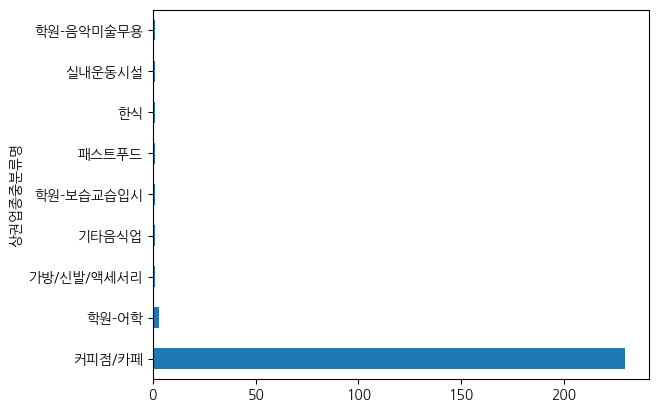

In [50]:
# "상권업중분류명"을 countplot 으로 시각화하고 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 봅니다.
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [51]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()
df_cafe.shape

(240, 41)


(230, 41)

In [52]:
# 브랜드명으로 각 카페의 갯수를 세어봅니다.
df_cafe["브랜드명"].value_counts()

브랜드명
스타벅스    118
이디야     112
Name: count, dtype: int64

<Axes: xlabel='브랜드명', ylabel='count'>

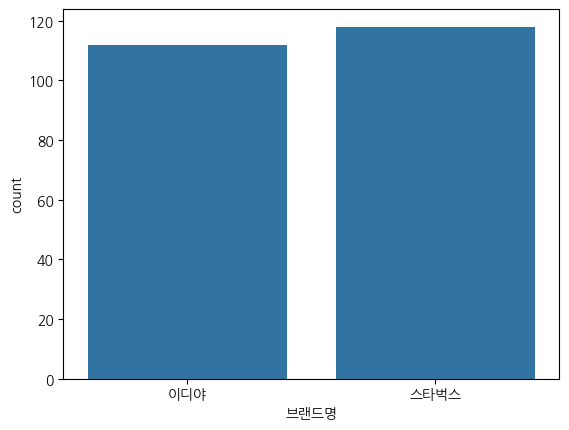

In [55]:
# 브랜드명을 막대그래프로 그려봅니다.
sns.countplot(data=df_cafe, x="브랜드명")

<Axes: xlabel='시군구명', ylabel='count'>

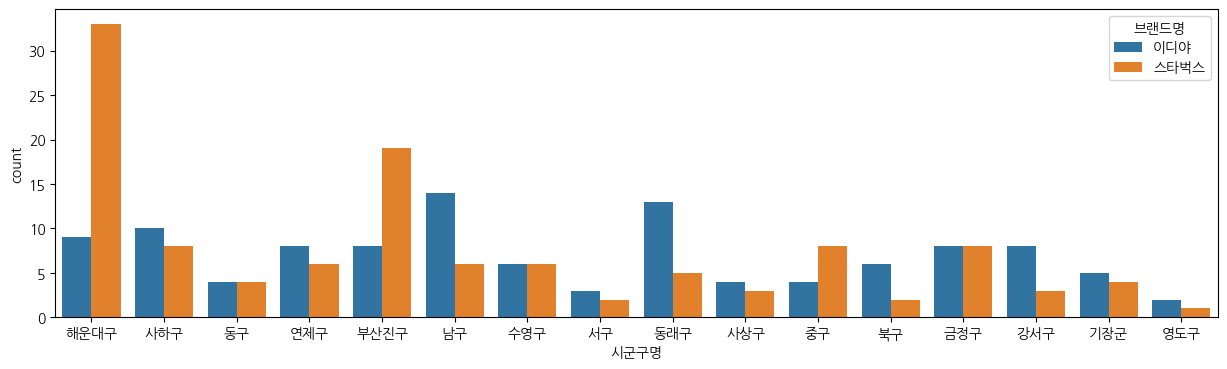

In [56]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

<Axes: xlabel='경도', ylabel='위도'>

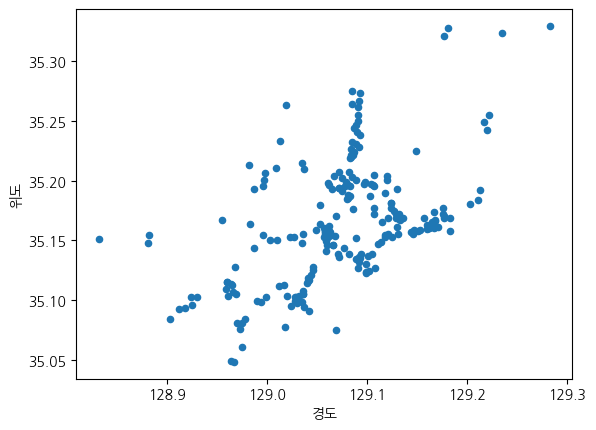

In [57]:
# pandas로 scatterplot을 그려봅니다.
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<Axes: xlabel='경도', ylabel='위도'>

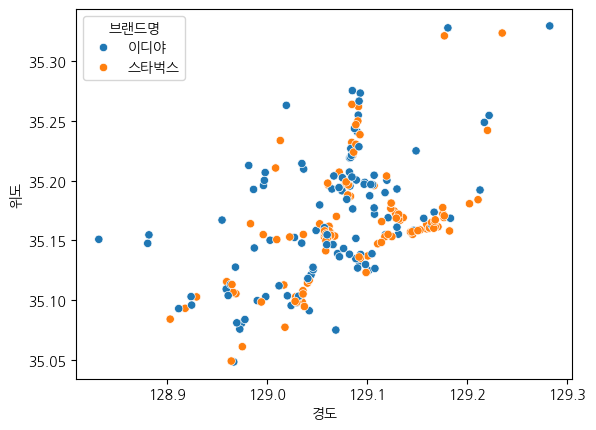

In [58]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

#### jointplot 그리기

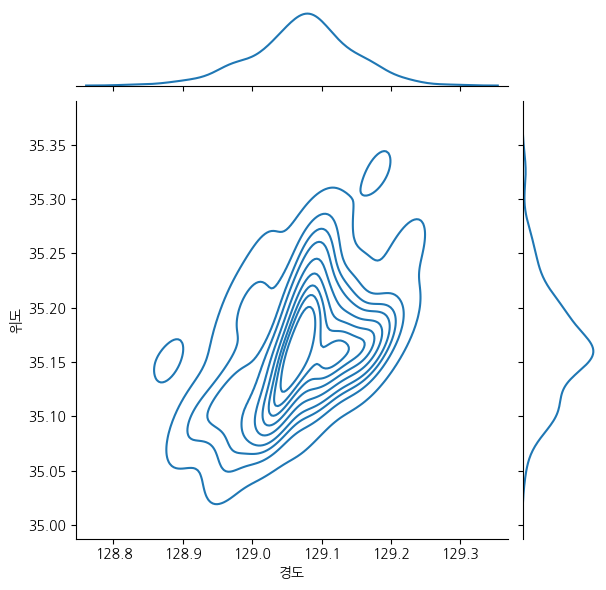

In [59]:
# jointplot 그리기
sns.jointplot(data=df_cafe, x="경도", y="위도", kind="kde")

In [60]:
# 구별로 브랜드별 점포수를 구합니다.
# groupby 를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있습니다.
# 그룹화한 결과를 df_cafe_vs 변수에 담아서 재사용합니다.
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs.head()

시군구명  브랜드명
강서구   스타벅스    3
      이디야     8
금정구   스타벅스    8
      이디야     8
기장군   스타벅스    4
Name: 상호명, dtype: int64

In [61]:
# reset_index 로 인덱스를 컬럼으로 만듭니다.
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강서구,스타벅스,3
1,강서구,이디야,8
2,금정구,스타벅스,8
3,금정구,이디야,8
4,기장군,스타벅스,4


In [62]:
# groupby '시군구명', '브랜드명' 으로 갯수를 세어봅니다.
# 결과에 대한 데이터프레임 컬럼명을 ['구', '브랜드명', '매장수'] 로 지정합니다.
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강서구,스타벅스,3
1,강서구,이디야,8
2,금정구,스타벅스,8
3,금정구,이디야,8
4,기장군,스타벅스,4


#### pivot_table 로 구별 매장수 구하기

In [63]:
# 위에서 했던 과정을 pivot_table 로 구합니다.
pivot = pd.pivot_table(data=df_cafe, 
               index=["시군구명", "브랜드명"], 
               values="상호명", aggfunc="count")
pivot.head()

상호명
시군구명 브랜드명     
강서구  스타벅스    3
     이디야     8
금정구  스타벅스    8
     이디야     8
기장군  스타벅스    4

In [64]:
# 특정 구 데이터만 가져와서 보기
pivot.loc["금정구"]

,상호명
브랜드명,
스타벅스,8
이디야,8


### 막대그래프로 시각화 하기

<Axes: xlabel='구', ylabel='매장수'>

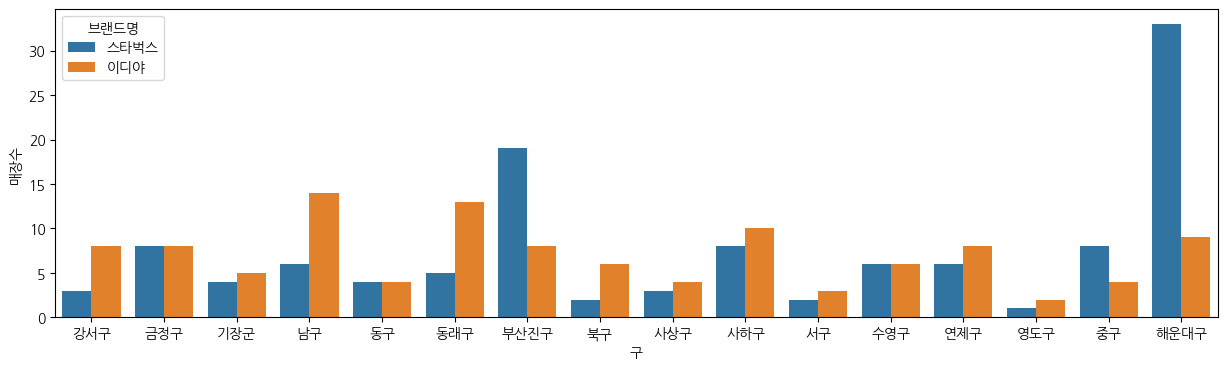

In [65]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs, x="구", y="매장수", hue="브랜드명")

<Axes: xlabel='구', ylabel='매장수'>

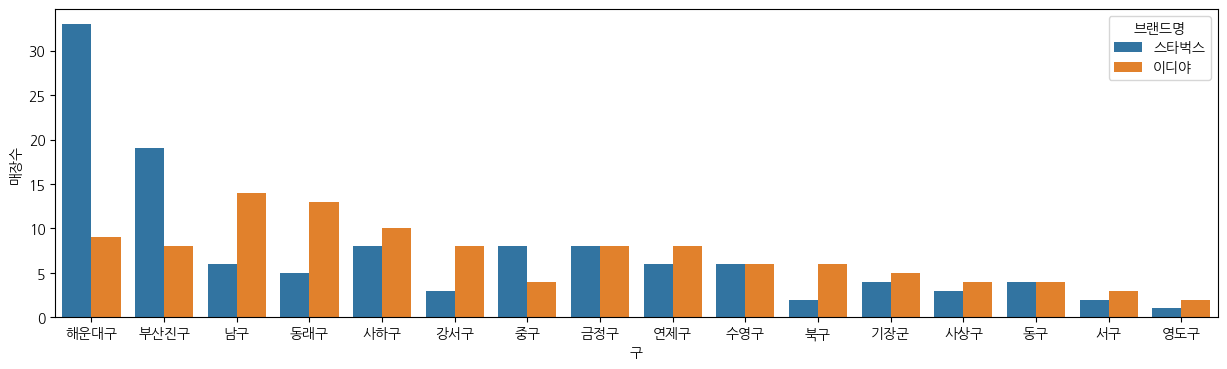

In [66]:
# seaborn의 barplot 을 활용해 구별 매장수를 시각화 합니다.
# barplot 정렬하기
plt.figure(figsize=(15, 4))
sns.barplot(data=df_cafe_vs.sort_values("매장수", ascending=False), x="구", y="매장수", hue="브랜드명")

* 브랜드명을 컬럼으로 만들기
* unstack 이해하기 : https://pandas.pydata.org/docs/user_guide/reshaping.html

<Axes: xlabel='시군구명,브랜드명'>

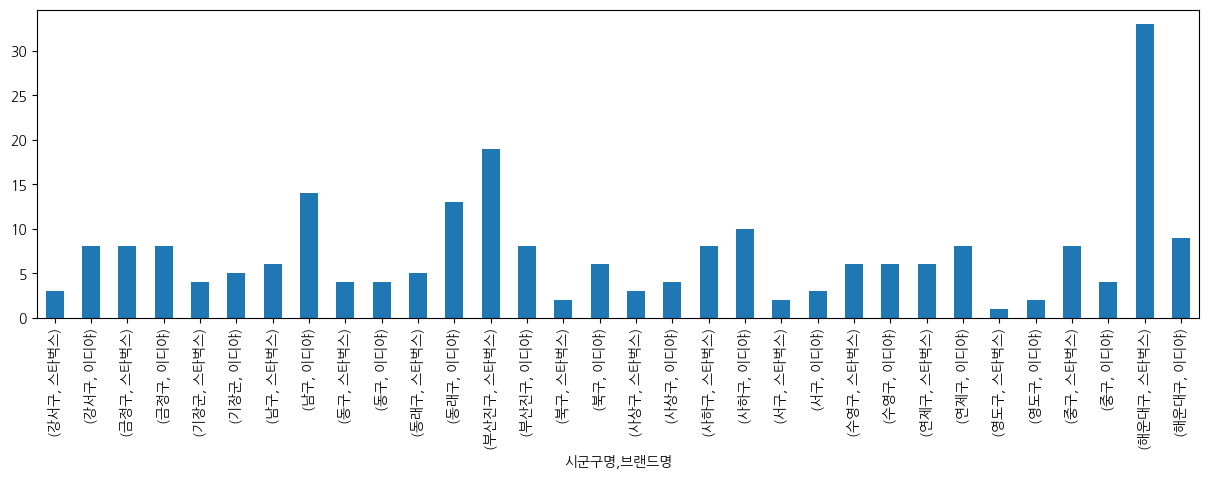

In [67]:
# groupby 를 통해 "시군구명", "브랜드명"으로 그룹화를 하고 "상호명"의 갯수를 세어봅니다.
# 갯수를 셀때는 count를 사용합니다.
group = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15, 4))

<Axes: xlabel='시군구명'>

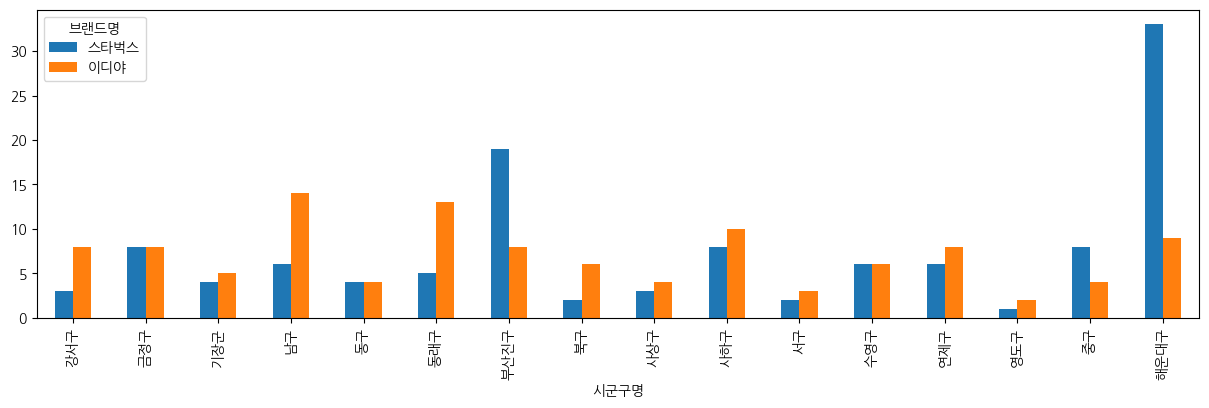

In [68]:
# 위에서 groupby 로 데이터를 집계한 결과를 시각화 합니다.

group.unstack().plot.bar(figsize=(15, 4))

In [69]:
# pivot_table 을 이용해서 구별 스타벅스, 이디야 매장수를 구합니다.

pivot = pd.pivot_table(data=df_cafe, index="시군구명", 
               columns="브랜드명", 
               values="상호명", aggfunc="count")

<Axes: xlabel='시군구명'>

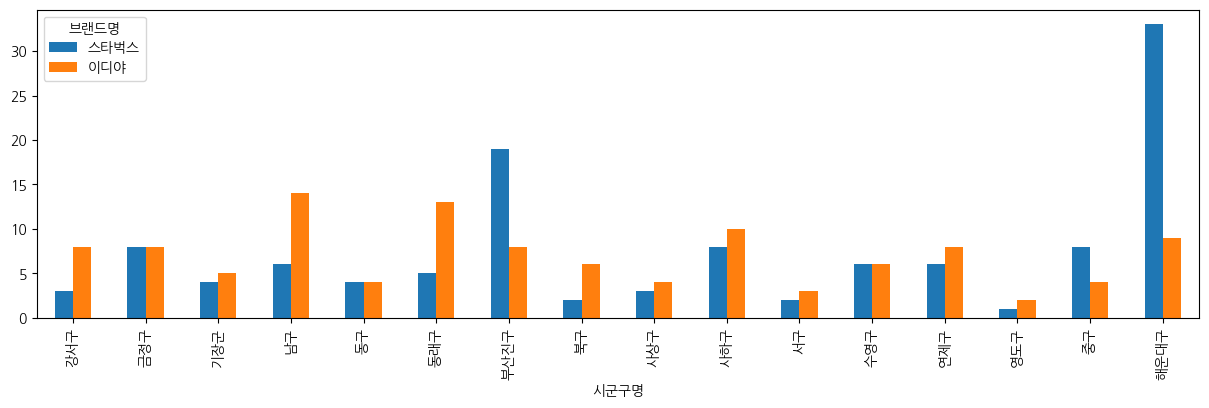

In [70]:
# 판다스의 장점 중 하나는 위에서처럼 구한 pivot_table을 시각화 해보기 쉽습니다.
# pivot_table 로 구한 결과를 plot.bar()를 통해 시각화 합니다.
pivot.plot.bar(figsize=(15, 4))

In [71]:
# 시군구명의 unique 값만 가져와서 리스트로 만듭니다.
gu_name_list = df_cafe["시군구명"].unique().tolist()
# 시군구명을 정렬합니다.
gu_name_list.sort()
# 슬라이싱을 통해 5개만 미리보기 합니다.
gu_name_list[:5]

['강서구', '금정구', '기장군', '남구', '동구']

<Axes: xlabel='시군구명', ylabel='count'>

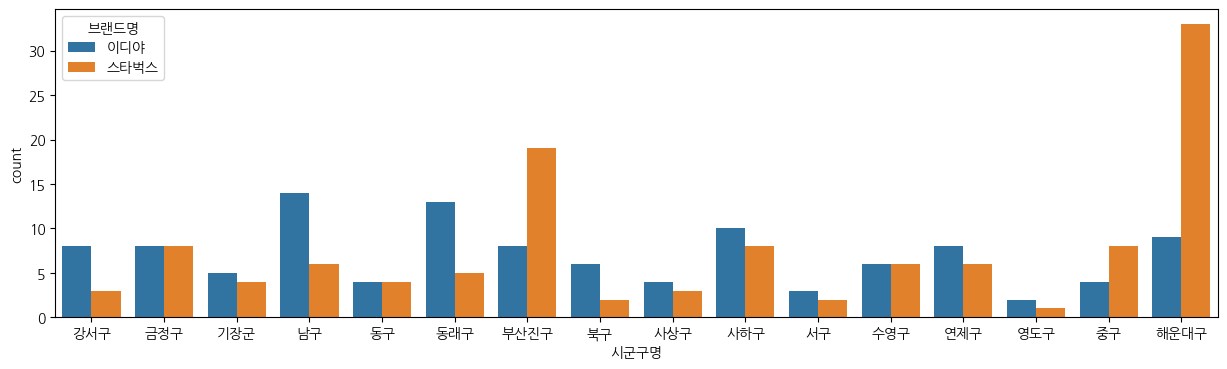

In [72]:
# Pandas 로 시각화를 하는 방법도 있지만 seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해줍니다.
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 됩니다. 
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합합니다.
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 합니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명", order=gu_name_list)

In [73]:
import folium

In [74]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
lat, long

(35.163583644408, 129.07229691483366)

### 스타벅스 이디야 카페 매장 전체 분포
* 스타벅스와 이디야 매장을 Marker와 CircleMarker로 지도에 표현합니다.

In [75]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                        tooltip=title).add_to(m)
m

### choropleth 를 위한 GeoJSON 파일로드

In [82]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일입니다. 
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현합니다.
geo_path = 'data/lab3/geoJSON/busan.json'
import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

### 스타벅스 매장 분포

In [83]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구합니다.
# "브랜드명"컬럼으로 스타벅스만 가져옵니다.
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star.head()

,구,브랜드명,매장수
0,강서구,스타벅스,3
2,금정구,스타벅스,8
4,기장군,스타벅스,4
6,남구,스타벅스,6
8,동구,스타벅스,4


In [84]:
# df_cafe_starbucks 로 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'YlGn'을 사용합니다.

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)

m

### 이디야 매장 분포

In [85]:
# 이디야의 매장 수를 구합니다.
# "브랜드명"컬럼으로 이디야만 가져옵니다.
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강서구,이디야,8
3,금정구,이디야,8
5,기장군,이디야,5
7,남구,이디야,14
9,동구,이디야,4


In [86]:

m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)


for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명주소']}"
    
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)

m

In [87]:
# df_vs 라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만듭니다.
# 그리고 ["스타벅스", "이디야"] 로 컬럼명을 변경해주고 
# 스타벅스와 이디야의 매장을 비교한 값을 "매장수비교" 컬럼에 담아줍니다.
df_vs = df_cafe_vs.pivot(index="구", columns="브랜드명", values="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강서구,3,8,False
금정구,8,8,False
기장군,4,5,False
남구,6,14,False
동구,4,4,False


In [88]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력하도록 합니다.
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강서구,3,8,0.0
금정구,8,8,0.0
기장군,4,5,0.0
남구,6,14,0.0
동구,4,4,0.0


In [89]:
# 구를 컬럼명으로 사용하기 위해 reset_index 를 합니다.
# 데이터 프레임을 df_vs 에 저장합니다.
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강서구,3,8,0.0
1,금정구,8,8,0.0
2,기장군,4,5,0.0
3,남구,6,14,0.0
4,동구,4,4,0.0


### Choropleth 로 매장수의 많고 적음에 따라 표현하기

In [90]:
# 스타벅스 매장 수 구하기
# choropleth의 색상은 fill_color = 'BuGn'을 사용합니다.
# CircleMarker의 radius 지정시 int 타입일 때 다음과 같은 타입오류가 나서 
# float type 으로 변경이 필요합니다.
# TypeError: Object of type 'int64' is not JSON serializable


m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m

In [91]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강서구,128.912945,35.127668
1,금정구,129.088913,35.247444
2,기장군,129.217576,35.269447
3,남구,129.089149,35.135400
4,동구,129.044817,35.122586


In [92]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on="구", right_on="시군구명")
df_vs.head()

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강서구,3,8,0.0,강서구,128.912945,35.127668
1,금정구,8,8,0.0,금정구,129.088913,35.247444
2,기장군,4,5,0.0,기장군,129.217576,35.269447
3,남구,6,14,0.0,남구,129.089149,35.135400
4,동구,4,4,0.0,동구,129.044817,35.122586


In [93]:
# 구별로 CircleMarker를 표현하기 위해서는 각 구의 위경도 값을 구해야 합니다.
# 구별 위도와 경도를 가져와 평균 값을 구해서 사용합니다.
# 특정 구의 위경도의 평균을 구합니다.

for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    print(df_vs.loc[i, "구"], sub_lat, sub_long)

강서구 35.12766797041563 128.9129450934612
금정구 35.24744362256337 129.08891261474895
기장군 35.26944703948166 129.21757556590512
남구 35.13540041484272 129.08914893132376
동구 35.12258643772434 129.04481663234262
동래구 35.20499765595982 129.08588201332438
부산진구 35.15661170937163 129.05513084605485
북구 35.21686205140813 129.013012272873
사상구 35.154814143480415 128.99063018978057
사하구 35.09231950680034 128.97149413600124
서구 35.100183220729505 129.0181822696814
수영구 35.15933307898536 129.11808747762183
연제구 35.19061857520828 129.07974830816093
영도구 35.086891887475296 129.04937448171268
중구 35.1018202280522 129.0317391482376
해운대구 35.171051367202054 129.15119897877202


In [94]:
cafes = ["스타벅스", "이디야"]
for cafe in cafes:
    print(cafe)

스타벅스
이디야


In [95]:
df_vs.head(1)

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강서구,3,8,0.0,강서구,128.912945,35.127668


In [96]:
np.sqrt(50)

7.0710678118654755

In [100]:
# 아래의 for문을 활용해서  스타벅스, 이디야로 매장수를 반영해 그리도록 합니다.
# choropleth의 색상은 fill_color = 'BuGn'을 사용합니다.
# CircleMarker 의 radius 크기를 구해서 원의 크기를 다르게 표현해 봅니다.
# 또, 경도에 특정 숫자를 더해 두 개의 원이 겹치지 않게 그려봅니다.


m = folium.Map([lat, long], zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)


for i in df_vs.index:
    sub_long = df_vs.loc[i, "경도"]
    sub_lat = df_vs.loc[i, "위도"]
    
    cafes = ["스타벅스", "이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        gu = df_vs.loc[i, "구"]
        tooltip = f"{gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color = "blue"
            sub_long = sub_long + 0.01
        else:
            color = "green"
            
            
        folium.CircleMarker([sub_lat, sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip,
                           ).add_to(m)
        
m

In [98]:
m.save("04-coffee-store-choropleth.html")